# Importing data Library & Raw data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as skl
pd.set_option("display.max.rows",75)

In [2]:
df=pd.read_table(r"F:\Project\PythonProject\Python Project - Bank Lending\XYZCorp_LendingData.txt",index_col=0,header=0)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (17,45,53) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.head()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,...,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,default_ind
id,,,,,,,,,,,,,,,,,,,,,
1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,Ryder,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [4]:
df.shape

(855969, 72)

# Checking Y-Varibales Status

In [5]:
df['default_ind'].value_counts()

0    809502
1     46467
Name: default_ind, dtype: int64

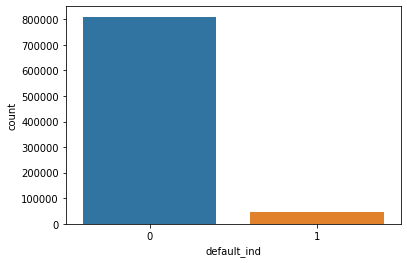

In [6]:
sns.countplot('default_ind',data=df)

# Checking Co-relation With Y-variables

In [7]:
list=df[df.columns].corr()['default_ind'][:]
list

member_id                     -0.220181
loan_amnt                     -0.004907
funded_amnt                   -0.005797
funded_amnt_inv               -0.008209
int_rate                       0.155037
installment                    0.004753
annual_inc                    -0.037066
dti                            0.004429
delinq_2yrs                   -0.009186
inq_last_6mths                 0.074407
mths_since_last_delinq         0.001317
mths_since_last_record         0.061484
open_acc                      -0.021698
pub_rec                       -0.019607
revol_bal                     -0.020696
revol_util                     0.044497
total_acc                     -0.021087
out_prncp                     -0.225960
out_prncp_inv                 -0.225959
total_pymnt                   -0.039220
total_pymnt_inv               -0.040232
total_rec_prncp               -0.090336
total_rec_int                  0.046050
total_rec_late_fee             0.140760
recoveries                     0.475738


# Removing variables with very low correlation values

In [8]:
list1=[]
for i in range(len(list)):
    if list[i]<0.02 and list[i]>(-0.02):
        list1.append(list.index[i])

In [9]:
for i in range(len(list1)):
    del df['{}'.format(list1[i])]

In [10]:
df.shape

(855969, 60)

# Dropping variables with highest missing values

In [11]:
df.isnull().sum()

member_id                         0
term                              0
int_rate                          0
grade                             0
sub_grade                         0
emp_title                     49443
emp_length                    43061
home_ownership                    0
annual_inc                        0
verification_status               0
issue_d                           0
pymnt_plan                        0
desc                         734157
purpose                           0
title                            33
zip_code                          0
addr_state                        0
earliest_cr_line                  0
inq_last_6mths                    0
mths_since_last_record       724785
open_acc                          0
revol_bal                         0
revol_util                      446
total_acc                         0
initial_list_status               0
out_prncp                         0
out_prncp_inv                     0
total_pymnt                 

In [12]:
bank_df=df.drop(['desc','mths_since_last_record','next_pymnt_d','annual_inc_joint','dti_joint','verification_status_joint',
                'open_acc_6m','open_il_6m','open_il_12m','open_il_24m','policy_code','mths_since_rcnt_il','total_bal_il','il_util',
                 'open_rv_12m','open_rv_24m','max_bal_bc','all_util','inq_fi','total_cu_tl','inq_last_12m'],axis=1)

In [13]:
bank_df.shape

(855969, 39)

# Treatment for missing values

In [14]:
bank_df.isnull().sum()

member_id                      0
term                           0
int_rate                       0
grade                          0
sub_grade                      0
emp_title                  49443
emp_length                 43061
home_ownership                 0
annual_inc                     0
verification_status            0
issue_d                        0
pymnt_plan                     0
purpose                        0
title                         33
zip_code                       0
addr_state                     0
earliest_cr_line               0
inq_last_6mths                 0
open_acc                       0
revol_bal                      0
revol_util                   446
total_acc                      0
initial_list_status            0
out_prncp                      0
out_prncp_inv                  0
total_pymnt                    0
total_pymnt_inv                0
total_rec_prncp                0
total_rec_int                  0
total_rec_late_fee             0
recoveries

In [15]:
bank_df.dtypes

member_id                    int64
term                        object
int_rate                   float64
grade                       object
sub_grade                   object
emp_title                   object
emp_length                  object
home_ownership              object
annual_inc                 float64
verification_status         object
issue_d                     object
pymnt_plan                  object
purpose                     object
title                       object
zip_code                    object
addr_state                  object
earliest_cr_line            object
inq_last_6mths             float64
open_acc                   float64
revol_bal                  float64
revol_util                 float64
total_acc                  float64
initial_list_status         object
out_prncp                  float64
out_prncp_inv              float64
total_pymnt                float64
total_pymnt_inv            float64
total_rec_prncp            float64
total_rec_int       

In [16]:
for x in bank_df.columns[:]:
    if bank_df[x].dtype=='object':
        bank_df[x].fillna(bank_df[x].mode()[0],inplace=True)
    elif bank_df[x].dtype=='int64' or bank_df[x].dtype=='float64':
        bank_df[x].fillna(round(bank_df[x].mean()),inplace=True)

In [17]:
#bank_df['emp_title'].fillna(bank_df['emp_title'].mode()[0],inplace=True)
#bank_df['emp_length'].fillna(bank_df['emp_length'].mode()[0],inplace=True)
#bank_df['title'].fillna(bank_df['title'].mode()[0],inplace=True)
#bank_df['last_pymnt_d'].fillna(bank_df['last_pymnt_d'].mode()[0],inplace=True)
#bank_df['last_credit_pull_d'].fillna(bank_df['last_credit_pull_d'].mode()[0],inplace=True)

In [18]:
#bank_df["revol_util"].fillna(round(bank_df["revol_util"].mean(),0),inplace=True)
#bank_df["tot_cur_bal"].fillna(round(bank_df["tot_cur_bal"].mean(),0),inplace=True)
#bank_df["total_rev_hi_lim"].fillna(round(bank_df["total_rev_hi_lim"].mean(),0),inplace=True)

In [19]:
bank_df.isnull().sum()

member_id                  0
term                       0
int_rate                   0
grade                      0
sub_grade                  0
emp_title                  0
emp_length                 0
home_ownership             0
annual_inc                 0
verification_status        0
issue_d                    0
pymnt_plan                 0
purpose                    0
title                      0
zip_code                   0
addr_state                 0
earliest_cr_line           0
inq_last_6mths             0
open_acc                   0
revol_bal                  0
revol_util                 0
total_acc                  0
initial_list_status        0
out_prncp                  0
out_prncp_inv              0
total_pymnt                0
total_pymnt_inv            0
total_rec_prncp            0
total_rec_int              0
total_rec_late_fee         0
recoveries                 0
collection_recovery_fee    0
last_pymnt_d               0
last_pymnt_amnt            0
last_credit_pu

# Removing Outlier

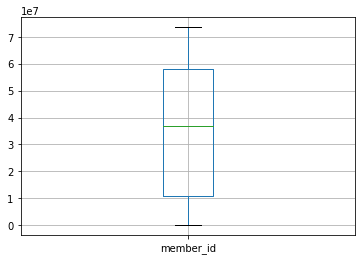

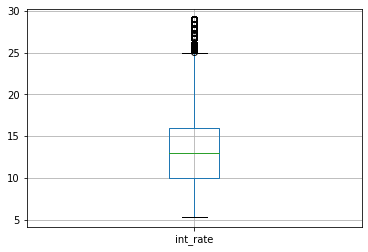

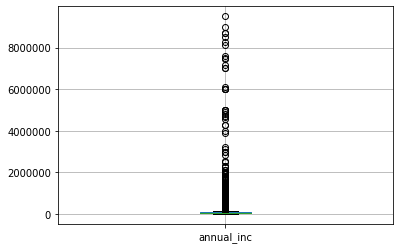

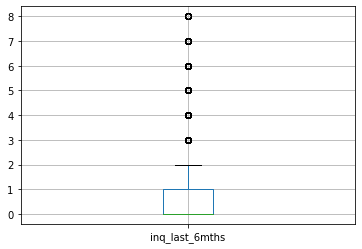

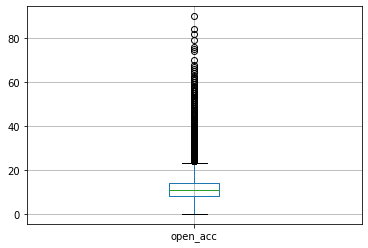

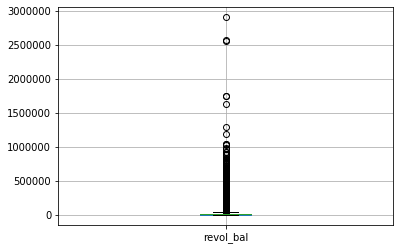

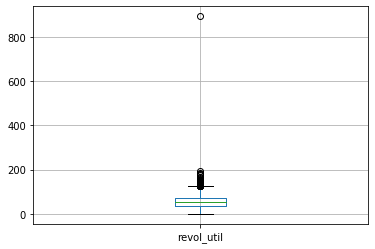

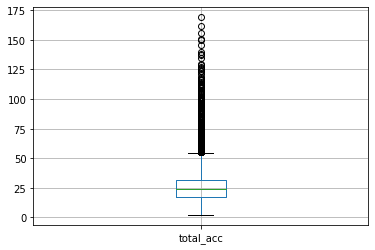

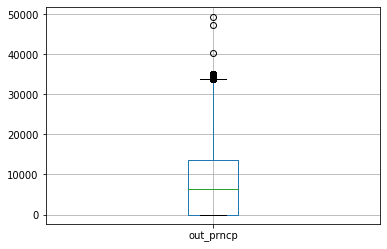

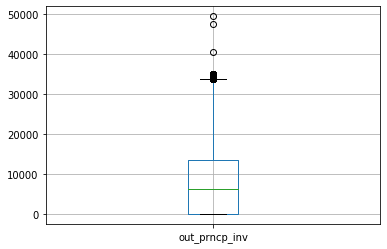

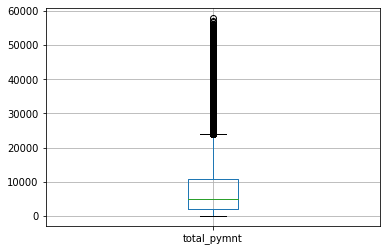

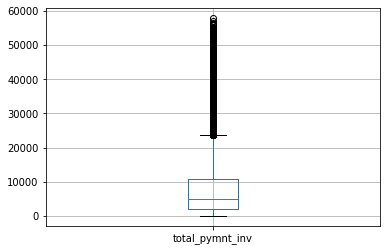

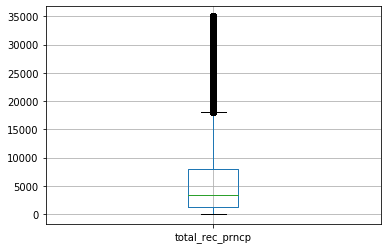

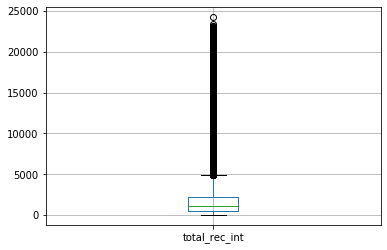

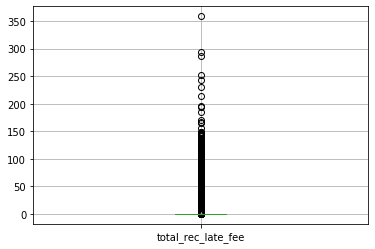

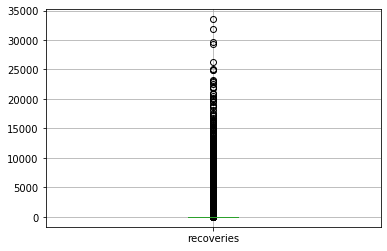

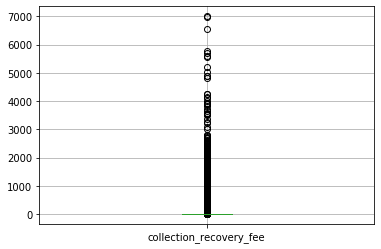

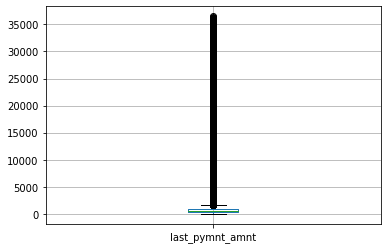

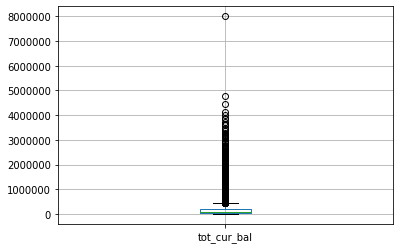

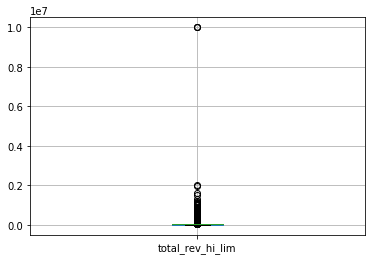

In [20]:
import matplotlib.pyplot as plt
colname=[]
for x in bank_df.columns[:-1]:
    if bank_df[x].dtype=="int64" or bank_df[x].dtype=="float64":
        colname.append(x)

for x in colname:
    bank_df.boxplot(column=x)
    plt.show()

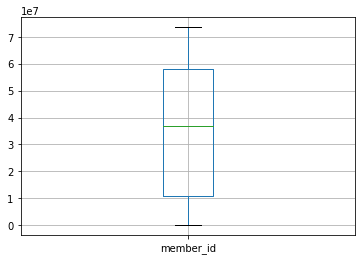

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


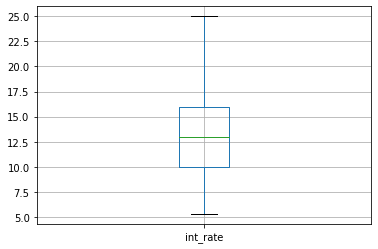

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


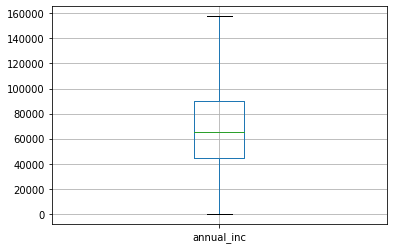

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


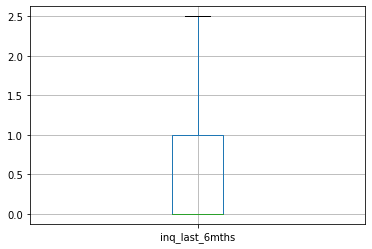

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


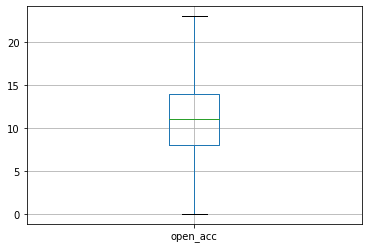

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


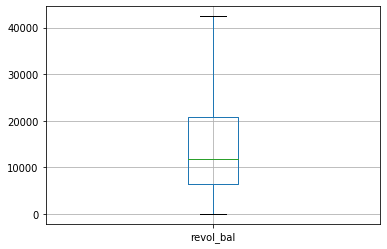

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


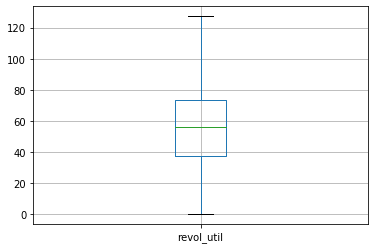

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


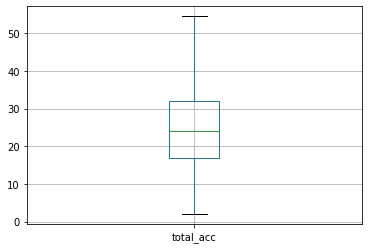

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


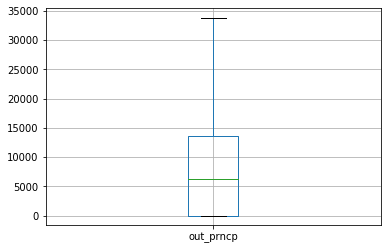

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


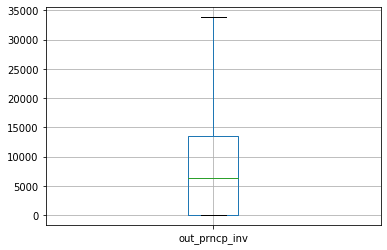

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


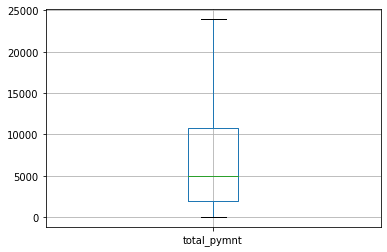

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


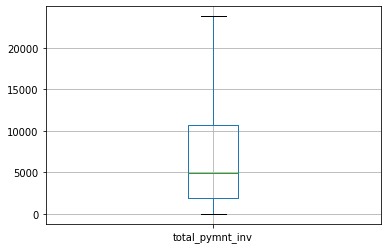

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


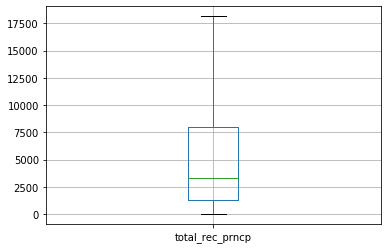

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


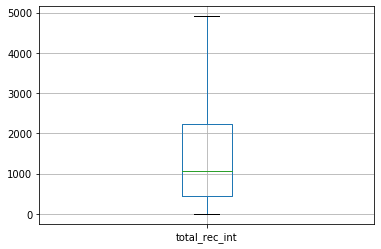

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


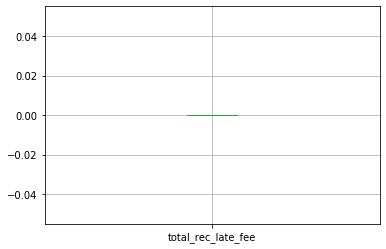

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


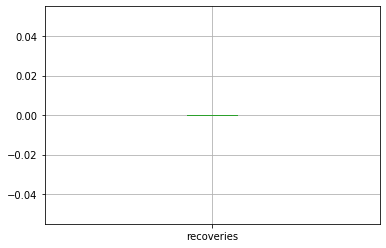

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


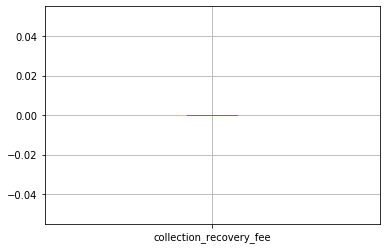

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


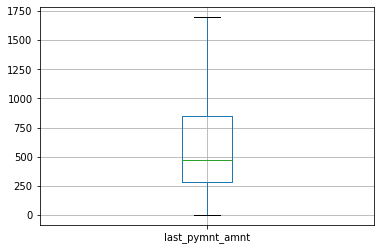

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


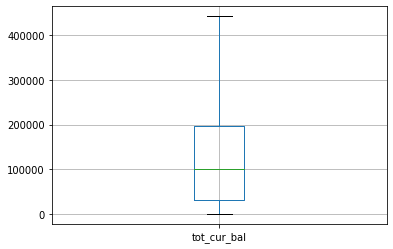

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


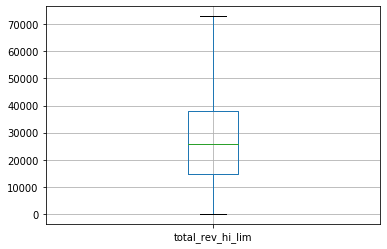

In [21]:
import matplotlib.pyplot as plt

for x in colname:
    q1 = bank_df[x].quantile(0.25) #first quartile value
    q3 = bank_df[x].quantile(0.75) # third quartile value
    iqr = q3-q1 #Interquartile range
    low  = q1-1.5*iqr #acceptable range
    high = q3+1.5*iqr #acceptable range
    bank_df_include = bank_df.loc[(bank_df[x] >= low) & \
                                (bank_df[x] <= high)] # meeting the acceptable range
    bank_df_exclude = bank_df.loc[(bank_df[x] < low) | \
                               (bank_df[x] > high)] #not meeting the acceptable range
    bank_df_exclude.loc[bank_df_exclude[x] >high, x] = high
    bank_df_exclude.loc[bank_df_exclude[x] <low, x] = low
    bank_df=pd.concat([bank_df_include,bank_df_exclude])
    bank_df.boxplot(column=x)
    plt.show()

# EDA treatment for important object variables

# Verification_status


In [22]:
bank_df['verification_status'].value_counts()

Source Verified    318178
Verified           280049
Not Verified       257742
Name: verification_status, dtype: int64

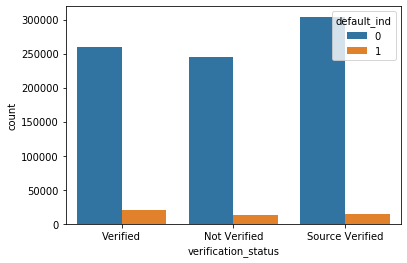

In [23]:
sns.countplot('verification_status',data=bank_df,hue='default_ind')

In [24]:
bank_df['verification_status'] = np.where(bank_df['verification_status']=='Not Verified', 0, bank_df['verification_status'])
bank_df['verification_status'] = np.where(bank_df['verification_status']=='Source Verified',1, bank_df['verification_status'])
bank_df['verification_status'] = np.where(bank_df['verification_status']=='Verified',2, bank_df['verification_status'])


In [25]:
bank_df['verification_status'].value_counts()

1    318178
2    280049
0    257742
Name: verification_status, dtype: int64

In [26]:
bank_df['verification_status']=bank_df['verification_status'].astype(float)

# Grade

In [27]:
bank_df['grade'].value_counts()

B    247998
C    236855
A    145665
D    132802
E     66448
F     21328
G      4873
Name: grade, dtype: int64

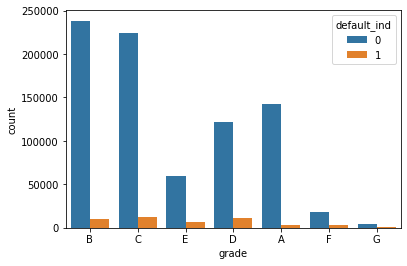

In [28]:
sns.countplot('grade',data=bank_df,hue='default_ind')

In [29]:
bank_df['grade'] = np.where(bank_df['grade']=='A', 0, bank_df['grade'])
bank_df['grade'] = np.where(bank_df['grade']=='B', 1, bank_df['grade'])
bank_df['grade'] = np.where(bank_df['grade']=='C', 1, bank_df['grade'])
bank_df['grade'] = np.where(bank_df['grade']=='D', 2, bank_df['grade'])
bank_df['grade'] = np.where(bank_df['grade']=='E', 2, bank_df['grade'])
bank_df['grade'] = np.where(bank_df['grade']=='F', 2, bank_df['grade'])
bank_df['grade'] = np.where(bank_df['grade']=='G', 2, bank_df['grade'])

In [30]:
bank_df['grade'].value_counts()

1    484853
2    225451
0    145665
Name: grade, dtype: int64

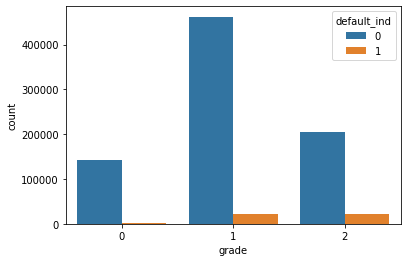

In [31]:
sns.countplot('grade',data=bank_df,hue='default_ind')

In [32]:
bank_df['grade']=bank_df['grade'].astype(float)

# Home Owenership

In [33]:
bank_df['home_ownership'].value_counts()

MORTGAGE    429106
RENT        342535
OWN          84136
OTHER          144
NONE            45
ANY              3
Name: home_ownership, dtype: int64

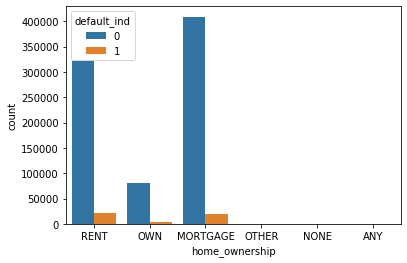

In [34]:
sns.countplot('home_ownership',data=bank_df,hue='default_ind')

In [35]:
bank_df['home_ownership'] = np.where(bank_df['home_ownership']=='RENT', 2, bank_df['home_ownership'])
bank_df['home_ownership'] = np.where(bank_df['home_ownership']=='OWN', 0, bank_df['home_ownership'])
bank_df['home_ownership'] = np.where(bank_df['home_ownership']=='MORTGAGE', 1, bank_df['home_ownership'])
bank_df['home_ownership'] = np.where(bank_df['home_ownership']=='NONE', 0, bank_df['home_ownership'])
bank_df['home_ownership'] = np.where(bank_df['home_ownership']=='OTHER', 0, bank_df['home_ownership'])
bank_df['home_ownership'] = np.where(bank_df['home_ownership']=='ANY', 0, bank_df['home_ownership'])

In [36]:
bank_df['home_ownership'].value_counts()

1    429106
2    342535
0     84328
Name: home_ownership, dtype: int64

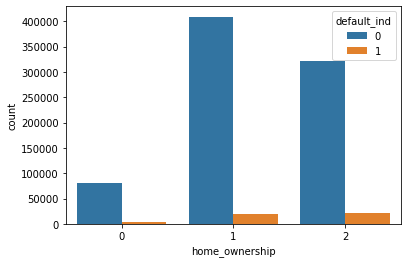

In [37]:
sns.countplot('home_ownership',data=bank_df,hue='default_ind')

In [38]:
bank_df['home_ownership']=bank_df['home_ownership'].astype(float)

# Label Encoding

In [39]:
bank_df.dtypes

member_id                  float64
term                        object
int_rate                   float64
grade                      float64
sub_grade                   object
emp_title                   object
emp_length                  object
home_ownership             float64
annual_inc                 float64
verification_status        float64
issue_d                     object
pymnt_plan                  object
purpose                     object
title                       object
zip_code                    object
addr_state                  object
earliest_cr_line            object
inq_last_6mths             float64
open_acc                   float64
revol_bal                  float64
revol_util                 float64
total_acc                  float64
initial_list_status         object
out_prncp                  float64
out_prncp_inv              float64
total_pymnt                float64
total_pymnt_inv            float64
total_rec_prncp            float64
total_rec_int       

In [40]:
colname=['term','sub_grade','emp_title','emp_length','pymnt_plan','pymnt_plan',
         'purpose','title','zip_code','addr_state','earliest_cr_line','initial_list_status','last_pymnt_d','last_credit_pull_d',
         'application_type']
colname

['term',
 'sub_grade',
 'emp_title',
 'emp_length',
 'pymnt_plan',
 'pymnt_plan',
 'purpose',
 'title',
 'zip_code',
 'addr_state',
 'earliest_cr_line',
 'initial_list_status',
 'last_pymnt_d',
 'last_credit_pull_d',
 'application_type']

In [41]:
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
for x in colname:
    bank_df[x]=le.fit_transform( bank_df[x])

In [42]:
bank_df["issue_d"]=pd.to_datetime(bank_df["issue_d"])
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 855969 entries, 1077501 to 23312976
Data columns (total 39 columns):
member_id                  855969 non-null float64
term                       855969 non-null int32
int_rate                   855969 non-null float64
grade                      855969 non-null float64
sub_grade                  855969 non-null int32
emp_title                  855969 non-null int32
emp_length                 855969 non-null int32
home_ownership             855969 non-null float64
annual_inc                 855969 non-null float64
verification_status        855969 non-null float64
issue_d                    855969 non-null datetime64[ns]
pymnt_plan                 855969 non-null int64
purpose                    855969 non-null int32
title                      855969 non-null int32
zip_code                   855969 non-null int32
addr_state                 855969 non-null int32
earliest_cr_line           855969 non-null int32
inq_last_6mths             

# Splitting data into X and Y

In [43]:
X=bank_df.values[:,:-1]
Y=bank_df.values[:,-1]
print(X)
print(Y)

[[1296599.0 0 10.65 ... 0 139766.0 32164.0]
 [1313524.0 0 15.96 ... 0 139766.0 32164.0]
 [1311748.0 1 12.69 ... 0 139766.0 32164.0]
 ...
 [15589908.0 0 11.99 ... 0 442557.5 72875.0]
 [8131306.0 1 17.56 ... 0 442557.5 72875.0]
 [25675936.0 0 19.52 ... 0 442557.5 72875.0]]
[0 0 0 ... 0 1 1]


In [44]:
Y=Y.astype(int)

# splitting data into train and test data based on issue date

In [45]:
X_train=bank_df[bank_df["issue_d"]<pd.to_datetime("June-2015")]
X_test=bank_df[bank_df["issue_d"]>pd.to_datetime("May-2015")]
Y_train=bank_df[bank_df["issue_d"]<pd.to_datetime("June-2015")]
Y_test=bank_df[bank_df["issue_d"]>pd.to_datetime("May-2015")]

In [46]:
X_train=X_train.drop(["default_ind"],axis=1)
X_test=X_test.drop(["default_ind"],axis=1)

In [47]:
Y_train=Y_train['default_ind']
Y_test=Y_test['default_ind']

In [48]:
X_train["issue_d"]=pd.to_numeric(X_train["issue_d"])
X_test["issue_d"]=pd.to_numeric(X_test["issue_d"])

In [49]:
# Bring in evaluator
#import sklearn.metrics as mt
#from sklearn.model_selection import cross_val_score

# Flatten Data
from sklearn.preprocessing import StandardScaler, RobustScaler

std_scaler = StandardScaler()
##rob_scaler = RobustScaler()

X_train = std_scaler.fit_transform(X_train)
X_test = std_scaler.transform(X_test)

# Use robust scaler to reduce outliers
#X_train= rob_scaler.fit_transform(X_train)
#X_test= rob_scaler.transform(X_test)

In [50]:
#from sklearn.preprocessing import MinMaxScaler

# create scaler 
##scaler = MinMaxScaler()

# fit and transform in one step 
##X_train = scaler.fit_transform(X_train)
##X_test = scaler.fit_transform(X_test)




# Model Building using Logistic Regression

In [51]:
from sklearn.linear_model import LogisticRegression
#create model
classifier=LogisticRegression()
#fitting training data to the model
classifier.fit(X_train,Y_train)

Y_pred=classifier.predict(X_test)
#print(list(zip(Y_test,Y_pred)

print(classifier.coef_)
print(classifier.intercept_)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[[ 3.90995361e-03 -5.26865592e-01 -1.47041315e-01  4.16641505e-02
  -5.45935106e-01  3.81954815e-02  2.89837345e-02  5.08493238e-02
   8.74187351e-02  1.66860427e-01  1.00805422e-01 -2.57843477e-02
  -1.80127835e-01 -1.09443176e-02  9.48517503e-03 -2.78730301e-02
  -1.60046019e-02  6.13403701e-02  2.99993140e-02  1.89883216e-01
  -1.38888345e-02  2.13587477e-02  8.53288047e-02 -4.83571301e+00
  -4.79344439e+00  1.20419130e+01 -1.18802425e+00 -1.47255846e+01
   1.99013066e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   1.63468148e-01 -4.98292998e-01 -1.15935397e-01  0.00000000e+00
  -5.20838886e-02  1.53646392e-01]]
[-9.13731607]


In [52]:
from sklearn.metrics import confusion_matrix,accuracy_score,\
classification_report

cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)

print("Classification report:")
print(classification_report(Y_test,Y_pred))

#calculate accuracy score
acc=accuracy_score(Y_test,Y_pred)
print("Accuracy of the model:", acc)

[[256473    207]
 [   155    156]]
Classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    256680
           1       0.43      0.50      0.46       311

    accuracy                           1.00    256991
   macro avg       0.71      0.75      0.73    256991
weighted avg       1.00      1.00      1.00    256991

Accuracy of the model: 0.9985913903599737


# Tunning the model

In [53]:
Y_pred_prob=classifier.predict_proba(X_test)
print(Y_pred_prob)

[[1.00000000e+00 3.71223302e-14]
 [1.00000000e+00 2.98012837e-11]
 [9.99359750e-01 6.40249893e-04]
 ...
 [9.99913144e-01 8.68559123e-05]
 [9.99801021e-01 1.98979363e-04]
 [9.99815064e-01 1.84936053e-04]]


In [54]:
y_pred_class=[]
for value in Y_pred_prob[:,1]:
    if value >0.50:
        y_pred_class.append(1)
    else:
        y_pred_class.append(0)
print(y_pred_class)   

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [55]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm=confusion_matrix(Y_test,y_pred_class)
print(cfm)

print("Classification report: ")
print(classification_report(Y_test,y_pred_class))

acc=accuracy_score(Y_test,y_pred_class)
print("Acuuracy of the model:",acc)

[[256473    207]
 [   155    156]]
Classification report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    256680
           1       0.43      0.50      0.46       311

    accuracy                           1.00    256991
   macro avg       0.71      0.75      0.73    256991
weighted avg       1.00      1.00      1.00    256991

Acuuracy of the model: 0.9985913903599737


In [56]:
for a in np.arange(0,1,0.02):
    predict_mine = np.where(Y_pred_prob[:,1] > a, 1, 0)
    cfm=confusion_matrix(Y_test, predict_mine)
    total_err=cfm[0,1]+cfm[1,0]
    print("Errors at threshold ", a, ":",total_err, " , type 2 error :",
         cfm[1,0]," , type 1 error:", cfm[0,1])

Errors at threshold  0.0 : 256680  , type 2 error : 0  , type 1 error: 256680
Errors at threshold  0.02 : 13686  , type 2 error : 61  , type 1 error: 13625
Errors at threshold  0.04 : 9673  , type 2 error : 61  , type 1 error: 9612
Errors at threshold  0.06 : 7586  , type 2 error : 62  , type 1 error: 7524
Errors at threshold  0.08 : 6130  , type 2 error : 62  , type 1 error: 6068
Errors at threshold  0.1 : 5120  , type 2 error : 63  , type 1 error: 5057
Errors at threshold  0.12 : 4400  , type 2 error : 67  , type 1 error: 4333
Errors at threshold  0.14 : 3775  , type 2 error : 72  , type 1 error: 3703
Errors at threshold  0.16 : 3258  , type 2 error : 74  , type 1 error: 3184
Errors at threshold  0.18 : 2840  , type 2 error : 78  , type 1 error: 2762
Errors at threshold  0.2 : 2491  , type 2 error : 82  , type 1 error: 2409
Errors at threshold  0.22 : 2165  , type 2 error : 85  , type 1 error: 2080
Errors at threshold  0.24 : 1897  , type 2 error : 88  , type 1 error: 1809
Errors at 

# ROC Curve

In [57]:
from sklearn import metrics

fpr, tpr,z = metrics.roc_curve(Y_test, y_pred_class)
auc = metrics.auc(fpr,tpr)
print(auc)
print(fpr)
print(tpr)

0.7504006327144487
[0.00000000e+00 8.06451613e-04 1.00000000e+00]
[0.         0.50160772 1.        ]


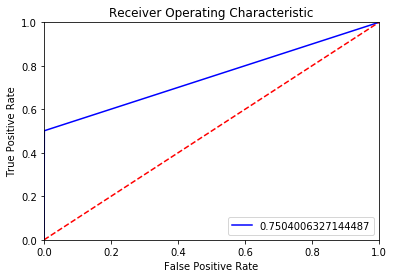

In [58]:
import matplotlib.pyplot as plt
#%matplotlib inline
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.show()



In [59]:
from sklearn import metrics

fpr, tpr,z = metrics.roc_curve(Y_test, Y_pred_prob[:,1])
auc = metrics.auc(fpr,tpr)
print(auc)
print(fpr)
print(tpr)

0.8859840871840123
[0.00000000e+00 0.00000000e+00 1.16877045e-05 1.16877045e-05
 2.33754091e-05 2.33754091e-05 2.72713106e-05 2.72713106e-05
 3.11672121e-05 3.11672121e-05 3.50631136e-05 3.50631136e-05
 3.89590151e-05 3.89590151e-05 5.06467197e-05 5.06467197e-05
 5.84385227e-05 5.84385227e-05 6.23344242e-05 6.23344242e-05
 7.01262272e-05 7.01262272e-05 8.18139317e-05 8.18139317e-05
 8.57098333e-05 8.57098333e-05 8.96057348e-05 8.96057348e-05
 9.35016363e-05 9.35016363e-05 9.73975378e-05 9.73975378e-05
 1.01293439e-04 1.01293439e-04 1.05189341e-04 1.05189341e-04
 1.09085242e-04 1.09085242e-04 1.16877045e-04 1.16877045e-04
 1.24668848e-04 1.24668848e-04 1.28564750e-04 1.28564750e-04
 1.32460651e-04 1.32460651e-04 1.36356553e-04 1.36356553e-04
 1.40252454e-04 1.40252454e-04 1.44148356e-04 1.44148356e-04
 1.51940159e-04 1.51940159e-04 1.67523765e-04 1.67523765e-04
 1.90899174e-04 1.90899174e-04 1.98690977e-04 1.98690977e-04
 2.10378682e-04 2.10378682e-04 2.22066386e-04 2.22066386e-04
 2.25

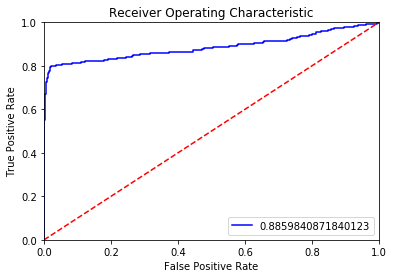

In [60]:
import matplotlib.pyplot as plt
#%matplotlib inline
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.show()

# Decission Tree

In [61]:
#predicting using the Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

model_DecisionTree=DecisionTreeClassifier(random_state=10,min_samples_leaf=5,max_depth=10)

#fit the model on the data and predict the values
model_DecisionTree.fit(X_train,Y_train)
Y_pred=model_DecisionTree.predict(X_test)

In [62]:
from sklearn.metrics import confusion_matrix,accuracy_score,\
classification_report

cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)

print("Classification report:")
print(classification_report(Y_test,Y_pred))

#calculate accuracy score
acc=accuracy_score(Y_test,Y_pred)
print("Accuracy of the model:", acc)

[[256671      9]
 [    13    298]]
Classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    256680
           1       0.97      0.96      0.96       311

    accuracy                           1.00    256991
   macro avg       0.99      0.98      0.98    256991
weighted avg       1.00      1.00      1.00    256991

Accuracy of the model: 0.9999143938892802


# Tunning the model Decission Tree

In [63]:
from sklearn.ensemble import RandomForestClassifier
lr=RandomForestClassifier(n_estimators=5, criterion='gini')
lr.fit(X_train,Y_train)
Y_pred=lr.predict(X_test)
Y_pred_prob=lr.predict_proba(X_test)

In [64]:
from sklearn.metrics import confusion_matrix,accuracy_score,\
classification_report

cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)

print("Classification report:")
print(classification_report(Y_test,Y_pred))

#calculate accuracy score
acc=accuracy_score(Y_test,Y_pred)
print("Accuracy of the model:", acc)

[[210882  45798]
 [     9    302]]
Classification report:
              precision    recall  f1-score   support

           0       1.00      0.82      0.90    256680
           1       0.01      0.97      0.01       311

    accuracy                           0.82    256991
   macro avg       0.50      0.90      0.46    256991
weighted avg       1.00      0.82      0.90    256991

Accuracy of the model: 0.8217564039207599


In [65]:
from sklearn.ensemble import AdaBoostClassifier
model_AdaBoost=AdaBoostClassifier(base_estimator=DecisionTreeClassifier(),n_estimators=50,random_state=10)
#fit yhe model on the data and predict the values
model_AdaBoost.fit(X_train,Y_train)
Y_pred=model_AdaBoost.predict(X_test)

In [66]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)

print("Classification report: ")
print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test,Y_pred)
print("Acuuracy of the model:",acc)

[[250598   6082]
 [    11    300]]
Classification report: 
              precision    recall  f1-score   support

           0       1.00      0.98      0.99    256680
           1       0.05      0.96      0.09       311

    accuracy                           0.98    256991
   macro avg       0.52      0.97      0.54    256991
weighted avg       1.00      0.98      0.99    256991

Acuuracy of the model: 0.9762909985174578


# Ensembleing the Model

In [67]:
from sklearn.ensemble import VotingClassifier
from sklearn.neighbors import KNeighborsClassifier

estimators = []
model1 = LogisticRegression()
estimators.append(('log', model1))
model2 = DecisionTreeClassifier(criterion='gini',random_state=10)
estimators.append(('cart', model2))

ensemble = VotingClassifier(estimators)
ensemble.fit(X_train,Y_train)
Y_pred=ensemble.predict(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [68]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)

print("Classification report: ")
print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test,Y_pred)
print("Acuuracy of the model:",acc)

[[256678      2]
 [   157    154]]
Classification report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    256680
           1       0.99      0.50      0.66       311

    accuracy                           1.00    256991
   macro avg       0.99      0.75      0.83    256991
weighted avg       1.00      1.00      1.00    256991

Acuuracy of the model: 0.9993813012907067


# Cross-Validation

In [69]:
from sklearn.model_selection import cross_val_score
acc=cross_val_score(estimator=lr,X=X_train,y=Y_train,cv=10)
acc.mean()

0.9822415231915667